<a href="https://colab.research.google.com/github/MercadoMR/AITraining/blob/main/FormacionIA_Clasificacion2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

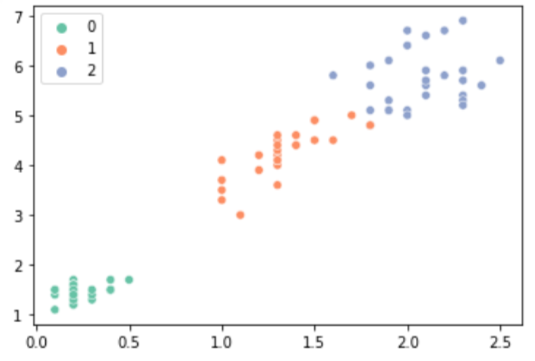

In [ ]:
# Descargamos los datos de Iris y los asignamos en un DataFrame
import pandas as pd
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()

df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

print("El total de datos es", len(df))

El total de datos es 150


In [ ]:
# Vemos los primeros 5 elementos del DataFrame
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
# Dividimos el conjunto de nuestros datos en grupos
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

In [ ]:
# Importamos la librería de árboles de decisión e instanciamos un objeto clasificador
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# (Depth hace referencia a la profundidad de clasificación del árbol)
clf = DecisionTreeClassifier(max_depth = 3, random_state = 0)

# Entrenamos el árbol de decisión
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

Profundidad del árbol: 3
Número de nodos terminales: 4


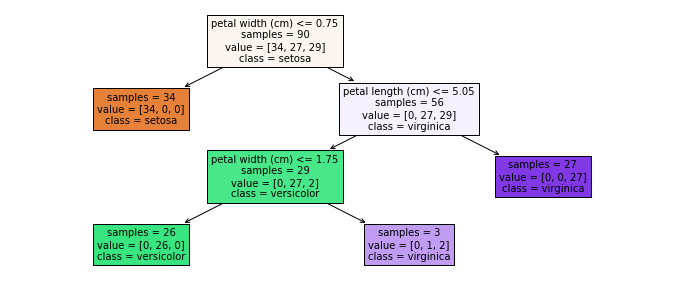

In [ ]:
# Vista gráfica del árbol creado
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = tree.plot_tree(
            decision_tree = clf,
            feature_names = iris['feature_names'],
            class_names   = iris.target_names,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [ ]:
# Predicción (Prueba de un ejemplo)

# CLASES:
# 0 -> Setosa
# 1 -> Versicolor
# 2 -> Virginica

Ejemplo = 0
for caracteristica, dato in zip(iris['feature_names'], X_test[Ejemplo]):
  print(caracteristica, dato)

print("\nCategoría ganadora:", clf.predict(X_test[0].reshape(1, -1)))

sepal length (cm) 5.8
sepal width (cm) 2.8
petal length (cm) 5.1
petal width (cm) 2.4

Categoría ganadora: [2]


In [ ]:
# Rendimiento del modelo
score = clf.score(X_train, y_train)
print(score)

# Rendimiento del modelo (Validación)
score = clf.score(X_test, y_test)
print(score)

0.9888888888888889
0.95


[0.6166666666666667, 0.8666666666666667, 0.95, 0.95, 0.95]


Text(0, 0.5, 'Score')

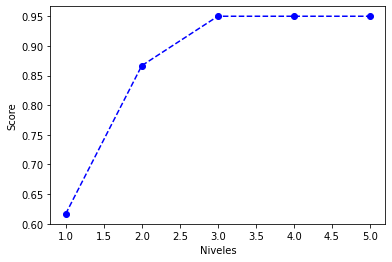

In [ ]:
# Agregamos diferentes valores de profundidad al árbol y vemos los resultados
max_depth_range = list(range(1, 6))
accuracy = []
for depth in max_depth_range:
  clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  accuracy.append(score)

print(accuracy)

plt.plot(max_depth_range, accuracy, 'bo--')
plt.xlabel("Niveles")
plt.ylabel("Score")

In [ ]:
# ¿Qué característica es más importante? 
importances = pd.DataFrame({'feature':iris['feature_names'],'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
print(importances)

             feature  importance
3   petal width (cm)       0.572
2  petal length (cm)       0.406
1   sepal width (cm)       0.022
0  sepal length (cm)       0.000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitte

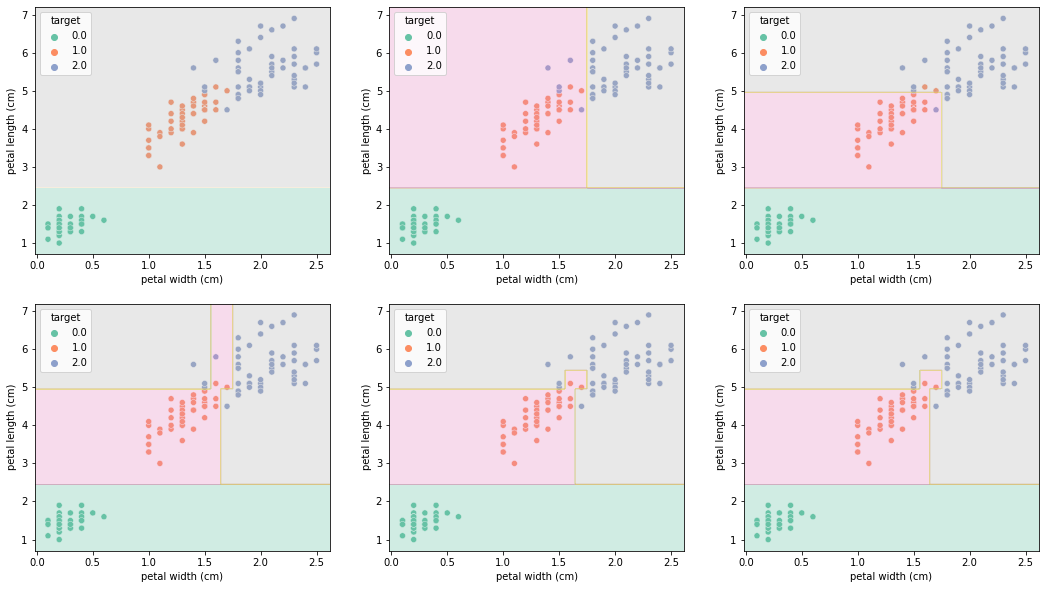

In [ ]:
# Visualizamos el árbol gráficamente:

# Librería gráfica sns (Ploteos especiales)
import seaborn as sns

# Nuestras entradas X, serán los datos de las flores (Le quitamos la columna de salidas al DataFrame)
# Nuestras salidas y, son las de la columna "Target" del DataFrame
X = df.drop("target", axis=1)
y = df["target"]

def Creador_Modelo(n):
  # Generamos el modelo del árbol para 2, 3, 4 y 5 niveles para visualizar sus divisiones
  clf = DecisionTreeClassifier(max_depth = n, random_state = 0)
  # Entrenamos los modelos
  clf.fit(X[['petal width (cm)', 'petal length (cm)']], y)
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
  contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap = 'Set2')

# Graficamos los datos y las fronteras creadas
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(18, 10)

# Proceso iterativo
for i in range(1, 7):
  plt.subplot(2, 3, i)
  ax = sns.scatterplot(X['petal width (cm)'], X['petal length (cm)'], hue=y, palette='Set2')
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()
  xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
  # Graficamos todos los datos:
  Creador_Modelo(i)

plt.show()

## Ejercicio:

In [ ]:
# Descargamos los datos de Iris y los asignamos en un DataFrame
import pandas as pd
from sklearn import datasets
wine = datasets.load_wine()

df2 = pd.DataFrame(data= np.c_[wine['data'], wine['target']], columns= wine['feature_names'] + ['target'])
print("El total de datos es", len(df2))

El total de datos es 178


In [ ]:
# Visualizar los datos
df2.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0.0
